In [2]:
import sys as sys
import numpy as np                  # pandas uses numpy, and sometimes want to use numpy within pandas
import pandas as pd                    # data package, redundant since already did
import matplotlib.pyplot as plt               # graphics package
import seaborn as sns               # makes matplotlib prettier without issuing a single command!
import datetime as dt                  # date and time module, often need to use

# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)

print(plt.style.available)
plt.style.use('fivethirtyeight')
%matplotlib inline 

Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Pandas version:  1.0.1
['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


#### Data dictionary
* conspuma           int16 consistent PUMA number
* perwt              int16 # persons observation represets
* age                 int8
* male                int8
* married             int8
* speakeng            int8 dummy var for speaks english
* empstat             int8 =1 (employed) for all in this subsetted sample, unemployed and not in labor force dropped
* ind1990            int16 industry code for 1990
* age2               int16 age**2
* white               int8 dummy race var
* yr                  int8 dummy var, 0 in 1990, 1 in 2000
* lhs                 int8 less than high school educ dummy
* hs                  int8 high school degree highest educ attainment dummy
* scol                int8 some college dummy
* col                 int8 college degree or higher dummy
* logwage          float32 log wage & salary income
* incwage          exp(logwage) = wage & salary income
* logwage_w        float32 log weekly wage & salary income/weeks worked ? #not used in article as far as I can see
* locdchnmshare    float32 China import share by industry weighted by conspuma employment by industry
* locvul           float32 local conspuma Mex import "vulnerability" defined as in article
* locdt            float32 local conspuma Mex import change in tariff weighted by ind employment, defined in article
* locvul_noag      float32 same as locvul but omitting ag sector
* locdt_noag       float32 same as locdt but omitting ag sector
* mex_t90          float64 US tariff on Mex imports 1990 by industry of employment as discussed in article
* mex_dt           float32 change in US tariff on imports by industry of employment * RCA, as in article
* mex_t90_noag     float32 same as mex_t90 except for industry=10 or =11 (agriculture) where set = 0
* mex_dt_noag      float32 same ax mex_dt except for industry =10 or =11
* mex_rca          float32 mex revealed comparative advantage RCA for industry, > 0, = 0 if mex doesn't export, max~=2
* dchnmshare       float32 change in china import share by industry
* border              int8 dummy variable for conspuma shares border with Mexico
* ind                int16 1990 industry classification code

In [45]:
id_df=pd.read_stata('Pennsylvania.dta')
id_df

,index,conspuma,stfip,stname,perwt,age,male,married,speakeng,empstat,...,locdt_noag,mex_t90,mex_dt,mex_t90_noag,mex_dt_noag,mex_rca,dchnmshare,border,ind,incwage
0,7365502,391,42,Pennsylvania,14,53,0,0,1,1,...,-0.007788,0.0,0.0,0.0,0.0,0.0,0.0,0,133,13499.996094
1,7365503,391,42,Pennsylvania,43,27,0,0,1,1,...,-0.007788,0.0,0.0,0.0,0.0,0.0,0.0,0,211,12799.995117
2,7365500,391,42,Pennsylvania,14,52,1,1,1,1,...,-0.007788,0.0,0.0,0.0,0.0,0.0,0.0,0,167,23999.992188
3,7365501,391,42,Pennsylvania,18,51,0,1,1,1,...,-0.007788,0.0,0.0,0.0,0.0,0.0,0.0,0,205,52000.011719
4,7365499,391,42,Pennsylvania,21,47,0,1,1,1,...,-0.007788,0.0,0.0,0.0,0.0,0.0,0.0,0,228,17100.001953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418968,7778249,422,42,Pennsylvania,7,40,0,0,1,1,...,-0.006908,0.0,0.0,0.0,0.0,0.0,0.0,0,150,10000.000977
418969,7778248,422,42,Pennsylvania,7,57,1,1,1,1,...,-0.006908,0.0,0.0,0.0,0.0,0.0,0.0,0,201,38500.000000
418970,7778254,422,42,Pennsylvania,8,28,1,1,1,1,...,-0.006908,0.0,0.0,0.0,0.0,0.0,0.0,0,136,19999.992188
418971,7778247,422,42,Pennsylvania,7,34,1,1,1,1,...,-0.006908,0.0,0.0,0.0,0.0,0.0,0.0,0,103,22299.990234


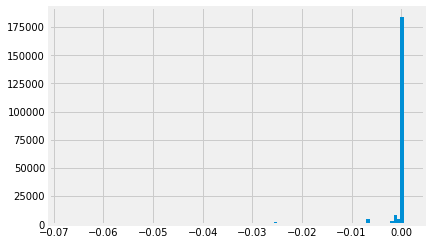

In [46]:
id_df.mex_dt_noag[id_df.yr>0].hist(bins=100)

In [47]:
id_df.loc[id_df.yr>0,'mex_dt_noag'].fillna(0).gt(0).sum()

2682

In [48]:
(id_df.loc[id_df.yr>0,'mex_dt_noag'].fillna(0).lt(0)).sum()

37438

In [49]:
id_df.loc[id_df.yr>0]

,index,conspuma,stfip,stname,perwt,age,male,married,speakeng,empstat,...,locdt_noag,mex_t90,mex_dt,mex_t90_noag,mex_dt_noag,mex_rca,dchnmshare,border,ind,incwage
0,7365502,391,42,Pennsylvania,14,53,0,0,1,1,...,-0.007788,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,133,13499.996094
1,7365503,391,42,Pennsylvania,43,27,0,0,1,1,...,-0.007788,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,211,12799.995117
2,7365500,391,42,Pennsylvania,14,52,1,1,1,1,...,-0.007788,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,167,23999.992188
3,7365501,391,42,Pennsylvania,18,51,0,1,1,1,...,-0.007788,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,205,52000.011719
4,7365499,391,42,Pennsylvania,21,47,0,1,1,1,...,-0.007788,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,228,17100.001953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418091,7779126,422,42,Pennsylvania,7,62,1,1,1,1,...,-0.006908,0.020061,-0.011536,0.020061,-0.011536,0.99234,0.082246,0,53,29999.990234
418092,7779125,422,42,Pennsylvania,29,37,0,0,1,1,...,-0.006908,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,164,3900.000977
418093,7779124,422,42,Pennsylvania,7,43,1,1,1,1,...,-0.006908,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,12,41999.996094
418094,7779123,422,42,Pennsylvania,14,43,0,0,1,1,...,-0.006908,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,214,17000.001953


In [50]:
217033-40120

176913

In [51]:
print(37438/176913) # about 15% of wage observations in industries "treated" by NAFTA

0.21161813998971246


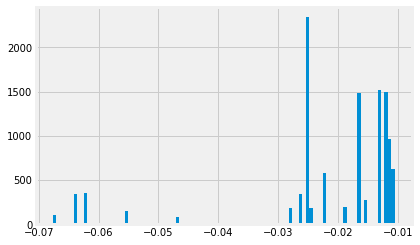

In [9]:
id_df.mex_dt_noag[(id_df.yr>0)&(id_df.mex_dt_noag<=-.01)].hist(bins=100)

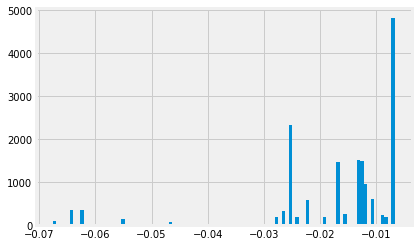

In [10]:
id_df.mex_dt_noag[(id_df.yr>0)&(id_df.mex_dt_noag<-.005)].hist(bins=100)

In [11]:
(id_df.loc[id_df.yr>0,'mex_dt_noag'].fillna(0).lt(-.005)).sum()

16442

In [12]:
print(1415/18000)  # about 8 % tariff cuts > .5%

0.07861111111111112


In [13]:
id_df.loc[id_df.yr>0,'mex_dt_noag'].fillna(0).lt(-.01).sum()

11199

In [14]:
print(895/18000)  # about 5 % tariff cuts > 1%

0.04972222222222222


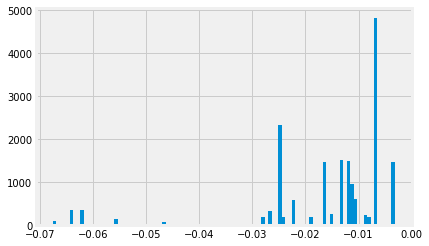

In [15]:
id_df.mex_dt_noag[(id_df.yr>0)&(id_df.mex_dt_noag<-.002)].hist(bins=100)

In [16]:
main=id_df.drop('stname',axis=1) # DescrStatsW sometimes barfs if it eats a string variable
main.describe()

,index,conspuma,stfip,perwt,age,male,married,speakeng,empstat,ind1990,...,locdt_noag,mex_t90,mex_dt,mex_t90_noag,mex_dt_noag,mex_rca,dchnmshare,border,ind,incwage
count,4.189730e+05,418973.000000,418973.0,418973.000000,418973.000000,418973.000000,418973.000000,418973.000000,418973.0,418973.000000,...,418973.000000,418973.000000,418973.000000,418973.000000,418973.000000,418973.000000,418973.000000,418973.0,418973.000000,418973.000000
mean,7.573162e+06,407.361205,42.0,20.061868,41.636048,0.537185,0.701513,0.999179,1.0,565.389903,...,-0.010982,0.002109,-0.001824,0.001957,-0.001675,0.160522,0.013564,0.0,133.461927,30241.406250
std,1.209472e+05,7.734185,0.0,11.411825,10.218994,0.498616,0.457595,0.028642,0.0,277.630139,...,0.003263,0.008215,0.006920,0.007891,0.006545,0.964491,0.042069,0.0,70.079432,29953.597656
min,7.363676e+06,391.000000,42.0,0.000000,25.000000,0.000000,0.000000,0.000000,1.0,10.000000,...,-0.023524,0.000000,-0.067598,0.000000,-0.067598,0.000000,-0.028184,0.0,1.000000,1.000000
25%,7.468419e+06,400.000000,42.0,8.000000,33.000000,0.000000,0.000000,1.000000,1.0,331.000000,...,-0.012300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,74.000000,14800.002930
50%,7.573162e+06,409.000000,42.0,21.000000,41.000000,1.000000,1.000000,1.000000,1.0,641.000000,...,-0.010620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,150.000000,24699.992188
75%,7.677905e+06,413.000000,42.0,28.000000,49.000000,1.000000,1.000000,1.000000,1.0,831.000000,...,-0.008964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,201.000000,36999.992188
max,7.782648e+06,422.000000,42.0,176.000000,64.000000,1.000000,1.000000,1.000000,1.0,960.000000,...,-0.005346,0.086621,0.001239,0.086621,0.001239,21.770504,0.466414,0.0,238.000000,309999.875000


In [17]:
from statsmodels.stats.weightstats import DescrStatsW as dsw 
#wtd_inc=dsw(tstdf.loc[:,'incwage'],weights=tstdf.loc[:,'perwt']) # person-weight variable, get incwage var only
# perwt is the weights variable


In [18]:
main.lhs.describe()

count    418973.000000
mean          0.079189
std           0.270034
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: lhs, dtype: float64

In [20]:
group1=main.loc[(main.lhs==1) & (main.yr==0), :]
group1.describe()

,index,conspuma,stfip,perwt,age,male,married,speakeng,empstat,ind1990,...,locdt_noag,mex_t90,mex_dt,mex_t90_noag,mex_dt_noag,mex_rca,dchnmshare,border,ind,incwage
count,2.032500e+04,20325.000000,20325.0,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.0,20325.000000,...,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.0,20325.000000,20325.000000
mean,7.566751e+06,407.413825,42.0,18.821550,46.481525,0.626716,0.722509,0.996950,1.0,432.521525,...,-0.011442,0.004637,-0.003981,0.004149,-0.003502,0.216480,0.021778,0.0,99.825387,18123.697266
std,1.186875e+05,7.639177,0.0,11.774662,11.230179,0.483689,0.447772,0.055148,0.0,278.391250,...,0.003516,0.012731,0.010284,0.012151,0.009556,1.023964,0.060008,0.0,69.100205,14230.094727
min,7.363676e+06,391.000000,42.0,0.000000,25.000000,0.000000,0.000000,0.000000,1.0,10.000000,...,-0.023524,0.000000,-0.067598,0.000000,-0.067598,0.000000,-0.028184,0.0,1.000000,2.000000
25%,7.487238e+06,402.000000,42.0,7.000000,37.000000,0.000000,0.000000,1.000000,1.0,171.000000,...,-0.012300,0.000000,-0.000923,0.000000,-0.000472,0.000000,0.000000,0.0,32.000000,9289.000000
50%,7.555902e+06,409.000000,42.0,18.000000,48.000000,1.000000,1.000000,1.000000,1.0,401.000000,...,-0.011508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,91.000000,15999.994141
75%,7.668843e+06,413.000000,42.0,26.000000,56.000000,1.000000,1.000000,1.000000,1.0,663.000000,...,-0.008964,0.001039,0.000000,0.000490,0.000000,0.116341,0.008797,0.0,158.000000,23999.992188
max,7.779094e+06,422.000000,42.0,112.000000,64.000000,1.000000,1.000000,1.000000,1.0,960.000000,...,-0.005346,0.086621,0.001239,0.086621,0.001239,21.770504,0.466414,0.0,238.000000,194742.015625


#### 2. Now, divide your state into 8 separate dataframes based on educational group and year (1990-yr==0, vs. 2000-yr==1):

This also shows the numbers of workers in each education category 

In [23]:
# you could do it manually, brute force
# but here a more elegant, Pythonic solution
# first, code up a categorical educ variable
main['educ']=0
main.loc[(main['lhs']==1),'educ']=1
main.loc[main.hs==1,'educ']=2
main.loc[main.scol==1,'educ']=3
main.loc[main.col==1,'educ']=4
print(main.educ.describe())
pd.crosstab(main.educ,main.yr,dropna=False,margins=True)

count    418973.000000
mean          2.655577
std           0.937176
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: educ, dtype: float64


yr,0,1,All
educ,,,
1,20325,12853,33178
2,91688,89772,181460
3,44440,56383,100823
4,45487,58025,103512
All,201940,217033,418973


In [25]:
# define and store my subsetted data in a dictionary!!!
frames = {i:dat for i, dat in main.groupby(['educ','yr'])} # a dict comprehension, creat dict of 8 dataframes
# groupby called on a dataferame returns a  tuple ('i','dat') mapping for the list of column labels 
# and the dataframe groups they define
# `i` is ['educ','yr'] combinations defining `dat` subsets from dataframe
frames[(3,1)]# value/dataframe tuple for key educ=3, yr=1 within dictionary of dataframes just created

,index,conspuma,stfip,perwt,age,male,married,speakeng,empstat,ind1990,...,mex_t90,mex_dt,mex_t90_noag,mex_dt_noag,mex_rca,dchnmshare,border,ind,incwage,educ
21,7365479,391,42,29,48,0,0,1,1,812,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,196,19999.992188,3
23,7365513,391,42,25,35,0,0,1,1,682,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,163,56000.023438,3
24,7365477,391,42,25,34,1,1,1,1,300,...,0.002216,-0.001901,0.002216,-0.001901,0.43626,0.087517,0,67,32999.988281,3
26,7365484,391,42,28,44,0,0,1,1,831,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,201,19100.003906,3
28,7365487,391,42,21,36,0,0,1,1,812,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,196,48600.007812,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418069,7779119,422,42,14,52,0,1,1,1,700,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,165,13200.001953,3
418072,7779122,422,42,11,51,1,0,1,1,842,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,205,46000.003906,3
418074,7779143,422,42,11,44,0,1,1,1,812,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,196,18000.001953,3
418080,7779137,422,42,8,33,0,1,1,1,871,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,214,15000.001953,3


In [24]:
# another way to do the exact same thing, but 5x more time required!
# dict comprehension apparently is much faster
# reference: https://stackoverflow.com/questions/50966466/convert-pandas-groupby-to-dict
moframes=dict(tuple(main.groupby(['educ','yr'])))
moframes[(3,1)]

,index,conspuma,stfip,perwt,age,male,married,speakeng,empstat,ind1990,...,mex_t90,mex_dt,mex_t90_noag,mex_dt_noag,mex_rca,dchnmshare,border,ind,incwage,educ
21,7365479,391,42,29,48,0,0,1,1,812,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,196,19999.992188,3
23,7365513,391,42,25,35,0,0,1,1,682,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,163,56000.023438,3
24,7365477,391,42,25,34,1,1,1,1,300,...,0.002216,-0.001901,0.002216,-0.001901,0.43626,0.087517,0,67,32999.988281,3
26,7365484,391,42,28,44,0,0,1,1,831,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,201,19100.003906,3
28,7365487,391,42,21,36,0,0,1,1,812,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,196,48600.007812,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418069,7779119,422,42,14,52,0,1,1,1,700,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,165,13200.001953,3
418072,7779122,422,42,11,51,1,0,1,1,842,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,205,46000.003906,3
418074,7779143,422,42,11,44,0,1,1,1,812,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,196,18000.001953,3
418080,7779137,422,42,8,33,0,1,1,1,871,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,214,15000.001953,3


#### 3. Now, report the following basic weighted descriptive statistics for each educational group/yr's `incwage`:
##### mean, median, variance

In [29]:
for i in [1,2,3,4]:
    for j in [0,1]:
        print('incwage wtd mean: educ= ',i,' yr= ',j,dsw(
            frames[i,j].loc[:,'incwage'],weights=frames[i,j].loc[:,'perwt']).mean)


incwage wtd mean: educ=  1  yr=  0 18270.16166218154
incwage wtd mean: educ=  1  yr=  1 23627.99677508502
incwage wtd mean: educ=  2  yr=  0 20267.502330341536
incwage wtd mean: educ=  2  yr=  1 27748.458350356916
incwage wtd mean: educ=  3  yr=  0 24847.86218996005
incwage wtd mean: educ=  3  yr=  1 33560.72703217617
incwage wtd mean: educ=  4  yr=  0 37393.026539097475
incwage wtd mean: educ=  4  yr=  1 55264.60916268397


In [30]:
for i in [1,2,3,4]:
    for j in [0,1]:
        print('incwage wtd variance: educ= ',i,' yr= ',j,dsw(
            frames[i,j].loc[:,'incwage'],weights=frames[i,j].loc[:,'perwt']).var)


incwage wtd variance: educ=  1  yr=  0 206967825.97012058
incwage wtd variance: educ=  1  yr=  1 588169766.1355953
incwage wtd variance: educ=  2  yr=  0 214929796.62233704
incwage wtd variance: educ=  2  yr=  1 465739076.741421
incwage wtd variance: educ=  3  yr=  0 352438252.56811154
incwage wtd variance: educ=  3  yr=  1 711917468.727108
incwage wtd variance: educ=  4  yr=  0 1000009267.3281235
incwage wtd variance: educ=  4  yr=  1 2851739368.231364


In [31]:
for i in [1,2,3,4]:
    for j in [0,1]:
        print('incwage wtd median: educ= ',i,' yr= ',j,dsw(
            frames[i,j].loc[:,'incwage'],weights=frames[i,j].loc[:,'perwt']).quantile(.5))


incwage wtd median: educ=  1  yr=  0 p
0.5    15999.994141
dtype: float64
incwage wtd median: educ=  1  yr=  1 p
0.5    19999.992188
dtype: float64
incwage wtd median: educ=  2  yr=  0 p
0.5    18000.001953
dtype: float64
incwage wtd median: educ=  2  yr=  1 p
0.5    24999.992188
dtype: float64
incwage wtd median: educ=  3  yr=  0 p
0.5    21999.992188
dtype: float64
incwage wtd median: educ=  3  yr=  1 p
0.5    29999.990234
dtype: float64
incwage wtd median: educ=  4  yr=  0 p
0.5    30318.990234
dtype: float64
incwage wtd median: educ=  4  yr=  1 p
0.5    43000.015625
dtype: float64


#### 4. Now report the weighted deciles of `incwage` for each educational group and year within your state:

In [32]:
for i in [1,2,3,4]:
    for j in [0,1]:
        print('incwage wtd deciles: educ= ',i,' yr= ',j,dsw(
            frames[i,j].loc[:,'incwage'],weights=frames[i,j].loc[:,'perwt']).quantile(
            [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]))


incwage wtd deciles: educ=  1  yr=  0 p
0.0         2.000000
0.1      4999.998047
0.2      8000.000977
0.3     10478.002930
0.4     13000.002930
0.5     15999.994141
0.6     18999.992188
0.7     21999.992188
0.8     26500.007812
0.9     32999.988281
1.0    194742.015625
dtype: float64
incwage wtd deciles: educ=  1  yr=  1 p
0.0         4.000000
0.1      5999.998047
0.2     10000.000977
0.3     13700.001953
0.4     16800.005859
0.5     19999.992188
0.6     23499.994141
0.7     27399.990234
0.8     32000.003906
0.9     40000.003906
1.0    309999.875000
dtype: float64
incwage wtd deciles: educ=  2  yr=  0 p
0.0         1.000000
0.1      5499.998047
0.2      9416.996094
0.3     12295.004883
0.4     15099.998047
0.5     18000.001953
0.6     21000.009766
0.7     24999.992188
0.8     29750.011719
0.9     35925.015625
1.0    194742.015625
dtype: float64
incwage wtd deciles: educ=  2  yr=  1 p
0.0         4.000000
0.1      8100.000977
0.2     13000.002930
0.3     17300.003906
0.4     21000.0097

#### 5. Now, please prepare a bar graph(s) contrasting the deciles of incwage for each of the educational groups within your state in 1990:

In [33]:
dec_ser_ed1_90=dsw(frames[1,0].loc[:,'incwage'],weights=frames[1,0].loc[:,'perwt']).quantile(
            [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
dec_ser_ed2_90=dsw(frames[2,0].loc[:,'incwage'],weights=frames[2,0].loc[:,'perwt']).quantile(
            [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
dec_ser_ed3_90=dsw(frames[3,0].loc[:,'incwage'],weights=frames[3,0].loc[:,'perwt']).quantile(
            [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
dec_ser_ed4_90=dsw(frames[4,0].loc[:,'incwage'],weights=frames[4,0].loc[:,'perwt']).quantile(
            [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
dec_dict_90={'ed1_90':dec_ser_ed1_90,'ed2_90':dec_ser_ed2_90,'ed3_90':dec_ser_ed3_90,'ed4_90':dec_ser_ed4_90}
decf_90=pd.DataFrame(dec_dict_90)
decf_90

,ed1_90,ed2_90,ed3_90,ed4_90
p,,,,
0.0,2.000000,1.000000,10.000000,7.000000
0.1,4999.998047,5499.998047,6999.999512,10000.000977
0.2,8000.000977,9416.996094,12000.000977,17125.001953
0.3,10478.002930,12295.004883,15800.005859,22210.996094
0.4,13000.002930,15099.998047,18999.992188,26965.007812
0.5,15999.994141,18000.001953,21999.992188,30318.990234
0.6,18999.992188,21000.009766,24999.992188,35000.000000
0.7,21999.992188,24999.992188,29999.990234,40249.996094
0.8,26500.007812,29750.011719,34499.988281,50000.007812


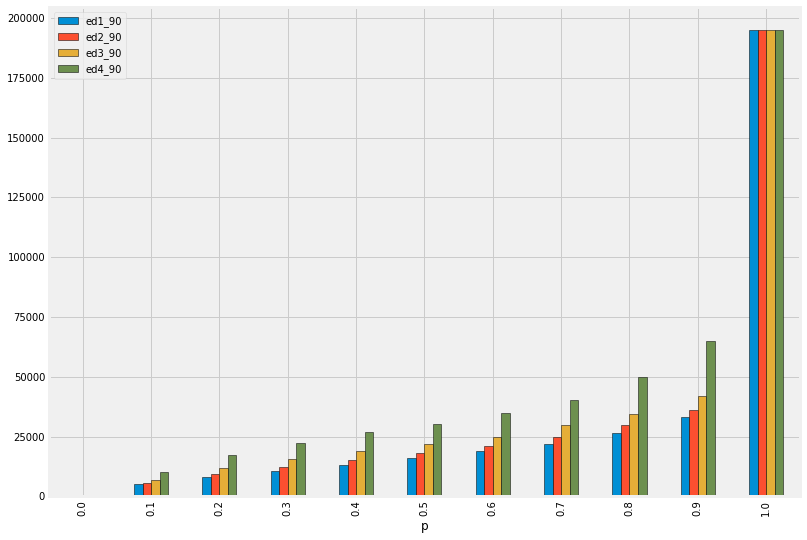

In [36]:

decf_90.plot(kind='bar',edgecolor='k',figsize=(12,9));

#### 6. Now, please prepare a bar graph(s) contrasting the deciles of incwage for each of the educational groups within your state in 2000:

In [37]:
dec_ser_ed1_00=dsw(frames[1,1].loc[:,'incwage'],weights=frames[1,1].loc[:,'perwt']).quantile(
            [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
dec_ser_ed2_00=dsw(frames[2,1].loc[:,'incwage'],weights=frames[2,1].loc[:,'perwt']).quantile(
            [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
dec_ser_ed3_00=dsw(frames[3,1].loc[:,'incwage'],weights=frames[3,1].loc[:,'perwt']).quantile(
            [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
dec_ser_ed4_00=dsw(frames[4,1].loc[:,'incwage'],weights=frames[4,1].loc[:,'perwt']).quantile(
            [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
dec_dict_00={'ed1_00':dec_ser_ed1_00,'ed2_00':dec_ser_ed2_00,'ed3_00':dec_ser_ed3_00,'ed4_00':dec_ser_ed4_00}
decf_00=pd.DataFrame(dec_dict_00)
decf_00

,ed1_00,ed2_00,ed3_00,ed4_00
p,,,,
0.0,4.000000,4.000000,4.000000,30.000002
0.1,5999.998047,8100.000977,10000.000977,15000.001953
0.2,10000.000977,13000.002930,16600.005859,23999.992188
0.3,13700.001953,17300.003906,21000.009766,29999.990234
0.4,16800.005859,21000.009766,24999.992188,36999.992188
0.5,19999.992188,24999.992188,29999.990234,43000.015625
0.6,23499.994141,29000.000000,33999.988281,50000.007812
0.7,27399.990234,32999.988281,40000.003906,58999.984375
0.8,32000.003906,39700.003906,46000.003906,70000.031250


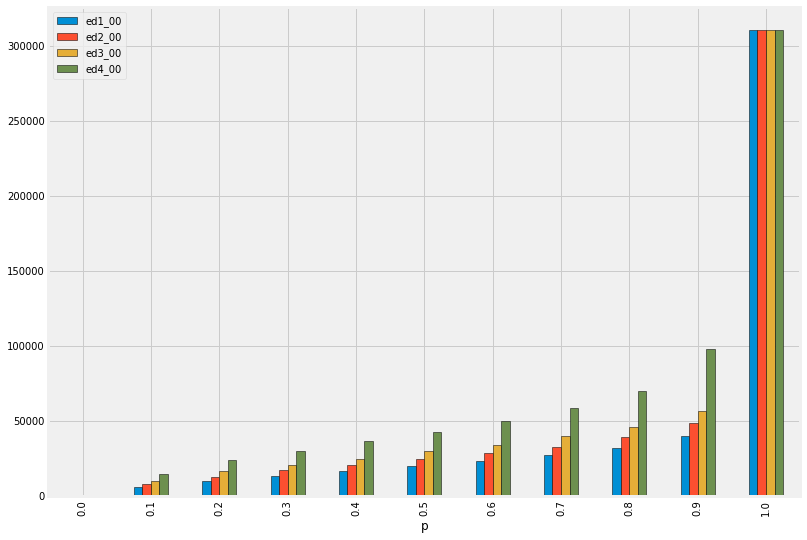

In [38]:
decf_00.plot(kind='bar',edgecolor='k',figsize=(12,9));

''

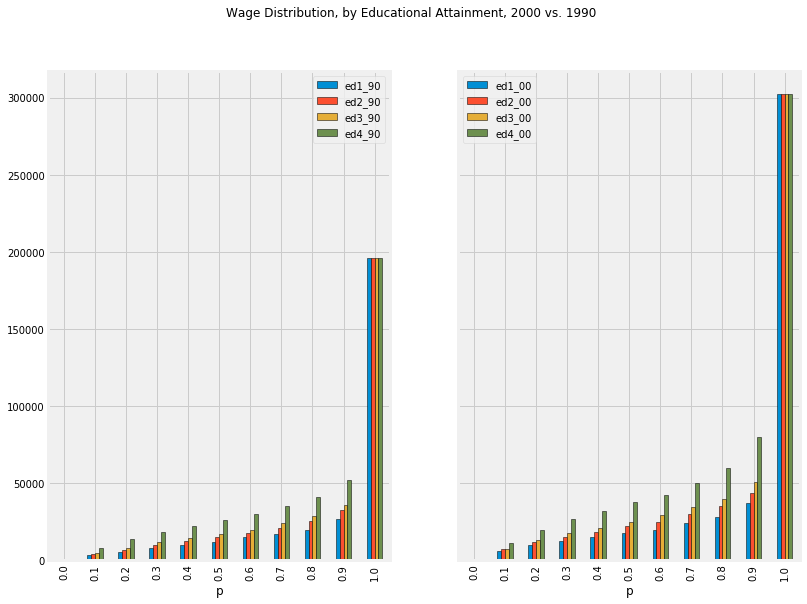

In [39]:
# combine two plots into two-column version
fig,ax=plt.subplots(figsize=(12,9),nrows=1,ncols=2,sharex=True,sharey=True)
decf_90.plot(kind='bar',edgecolor='k',figsize=(12,9),ax=ax[0])
decf_00.plot(kind='bar',edgecolor='k',figsize=(12,9),ax=ax[1])
fig.suptitle('Wage Distribution, by Educational Attainment, 2000 vs. 1990')
;

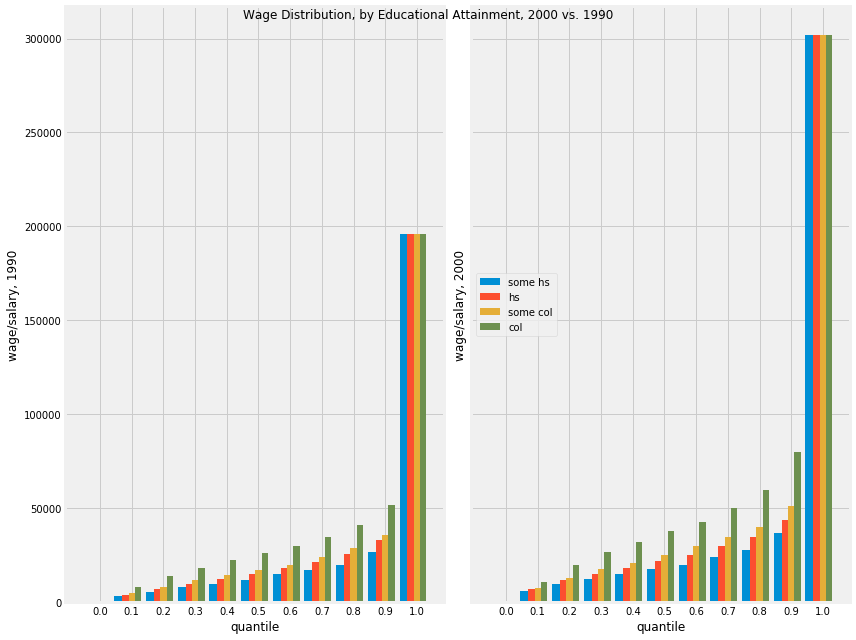

In [40]:
# barplot using object-oriented matplotlib methods


w=.04
x=decf_90.index

fig,ax=plt.subplots(figsize=(12,9),nrows=1,ncols=2,sharex=True,sharey=True)
ax[0].bar(x-w/2,height=decf_90.ed1_90,width=1.75*w)
ax[0].bar(x-w/4,height=decf_90.ed2_90,width=w)
ax[0].bar(x+w/4,height=decf_90.ed3_90,width=w)
ax[0].bar(x+w/2,height=decf_90.ed4_90,width=w/2)
ax[0].set_xticks(x)

ax[0].set_xlabel('quantile')
ax[0].set_ylabel('wage/salary, 1990')

fig.suptitle('Wage Distribution, by Educational Attainment, 2000 vs. 1990')
fig.set_tight_layout(True)
ax[1].bar(x-w/2,height=decf_00.ed1_00,width=1.75*w)
ax[1].bar(x-w/4,height=decf_00.ed2_00,width=w)
ax[1].bar(x+w/4,height=decf_00.ed3_00,width=w)
ax[1].bar(x+w/2,height=decf_00.ed4_00,width=w/2)
ax[1].set_xticks(x)
ax[1].legend(['some hs','hs','some col','col'],loc='center left')
ax[1].set_xlabel('quantile')
ax[1].set_ylabel('wage/salary, 2000');

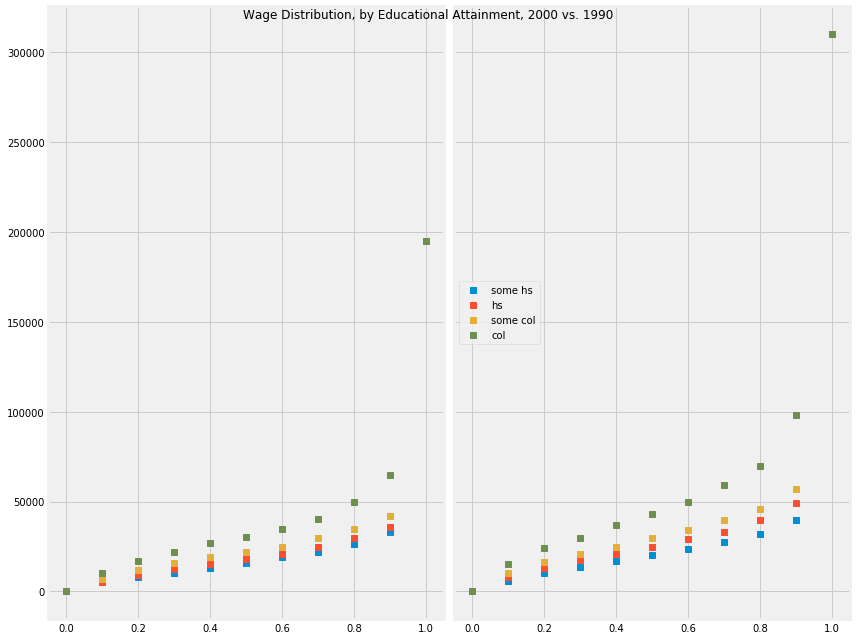

In [39]:
## another (simpler) visualization approach
decf_90['prob']=decf_90.index
decf_00['prob']=decf_00.index
fig,ax=plt.subplots(figsize=(12,9),nrows=1,ncols=2,sharex=True,sharey=True)
ax[0].plot(decf_90.prob,decf_90.ed1_90,ls='none',marker='s')
ax[0].plot(decf_90.prob,decf_90.ed2_90,ls='none',marker='s')
ax[0].plot(decf_90.prob,decf_90.ed3_90,ls='none',marker='s')
ax[0].plot(decf_90.prob,decf_90.ed4_90,ls='none',marker='s')
fig.suptitle('Wage Distribution, by Educational Attainment, 2000 vs. 1990')
fig.set_tight_layout(True)

ax[1].plot(decf_00.prob,decf_00.ed1_00,ls='none',marker='s')
ax[1].plot(decf_00.prob,decf_00.ed2_00,ls='none',marker='s')
ax[1].plot(decf_00.prob,decf_00.ed3_00,ls='none',marker='s')
ax[1].plot(decf_00.prob,decf_00.ed4_00,ls='none',marker='s')
ax[1].legend(['some hs','hs','some col','col'],loc='center left');



